# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. 
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 28 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

---
### Задача 1.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
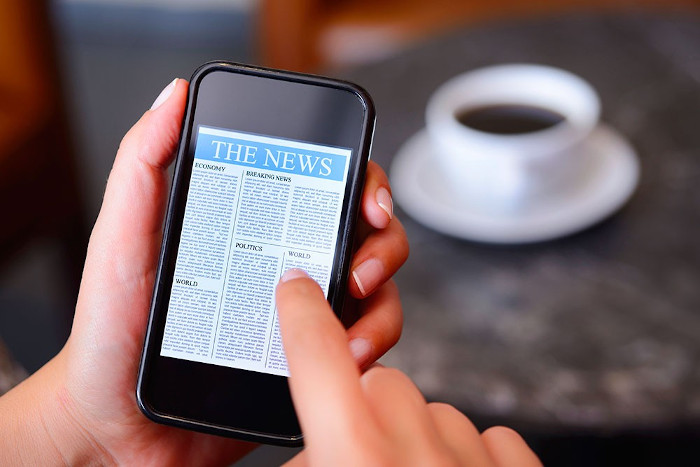



Перед выполнением задачи обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [4]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [5]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [6]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [7]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

Для начала переведем наши данные в DataFrame, так с ними будет удобнее работать:

In [8]:
data = pd.DataFrame(data=np.c_[data_train['data'], data_train['target']], columns=('text', 'target'))
data.head(3)

,text,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4


In [9]:
data_test = pd.DataFrame(data=np.c_[data_test['data'], data_test['target']], columns=('text', 'target'))
data_test.head(3)

,text,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"acooper@mac.cc.macalstr.edu (Turin Turambar, M...",0


Теперь разделим обучающую выборку на две части — непосредственно обучающую и валидационную:

In [10]:
data_train, data_valid = train_test_split(data, test_size=0.3, random_state=42)

In [41]:
arr_min_df = np.linspace(0.0001, 0.05, 10)
arr_max_df = np.linspace(0.05, 0.2, 10)

In [43]:
ans_min = []
for min in arr_min_df:
    vectorizer = CountVectorizer(min_df=min, max_df=0.1)
    vec_data_train = vectorizer.fit_transform(data_train['text']).toarray()
    vec_data_valid = vectorizer.transform(data_valid['text']).toarray()
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, data_train['target'])
    predictions = multinomial_nb.predict(vec_data_valid)
    target = data_valid['target']
    ans_min.append(accuracy_score(target, predictions))

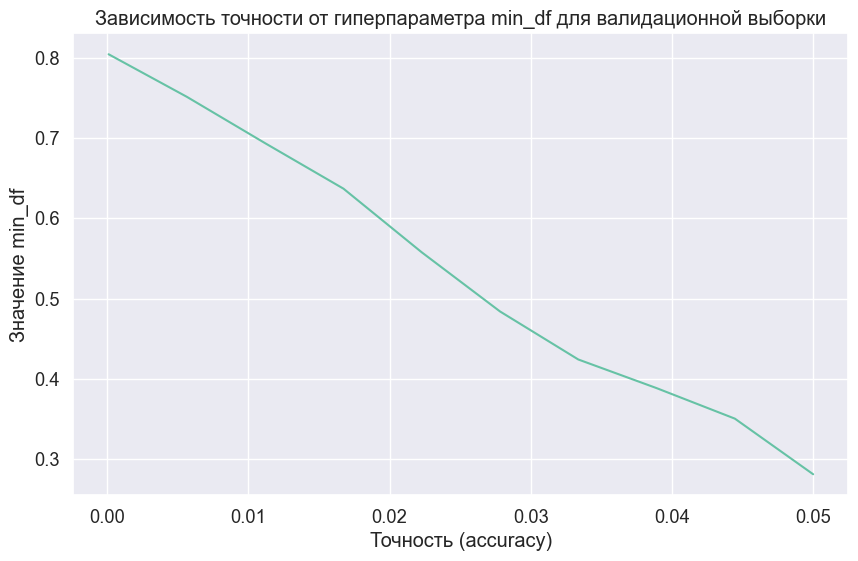

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(arr_min_df, ans_min)
plt.title('Зависимость точности от гиперпараметра min_df для валидационной выборки')
plt.ylabel('Значение min_df')
plt.xlabel('Точность (accuracy)')
None

In [46]:
ans_max = []
for max in arr_max_df:
    vectorizer = CountVectorizer(min_df=0.0001, max_df=max)
    vec_data_train = vectorizer.fit_transform(data_train['text']).toarray()
    vec_data_valid = vectorizer.transform(data_valid['text']).toarray()
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, data_train['target'])
    predictions = multinomial_nb.predict(vec_data_valid)
    target = data_valid['target']
    ans_max.append(accuracy_score(target, predictions))

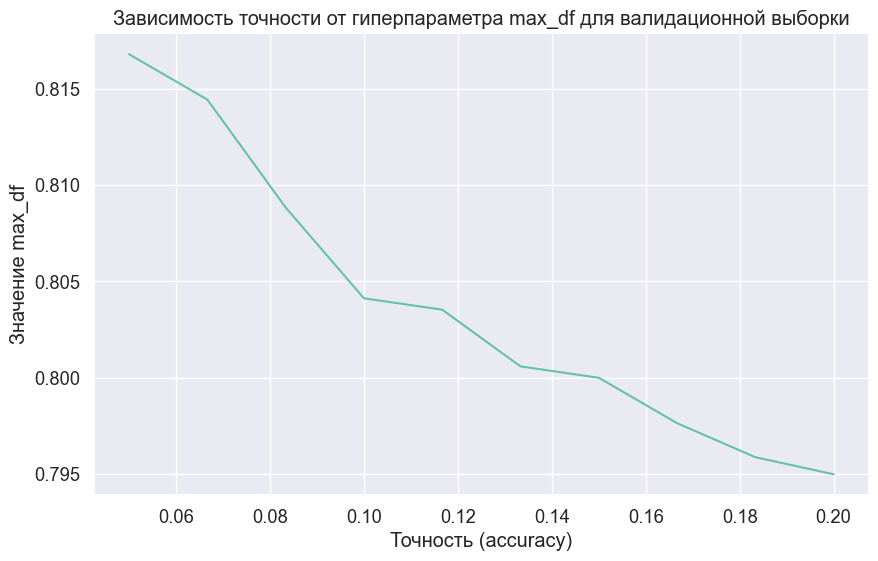

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(arr_max_df, ans_max)
plt.title('Зависимость точности от гиперпараметра max_df для валидационной выборки')
plt.ylabel('Значение max_df')
plt.xlabel('Точность (accuracy)')
None

Обучим теперь модель для оптимальных значений гиперпараметров min_df и max_df

Предобработаем данные:

In [70]:
vectorizer = CountVectorizer(min_df=0.0001, max_df=0.05)
vec_data_train = vectorizer.fit_transform(data_train['text']).toarray()
vec_data_test = vectorizer.transform(data_test['text']).toarray()

Обучаем модель (байесовский классификатор для данных, в которых все признаки являются дискретными):

In [71]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, data_train['target'])

MultinomialNB()

Посчитаем предсказание:

In [72]:
predictions = multinomial_nb.predict(vec_data_test)

Посчитайте качество на тестовой выборке.

In [73]:
target = data_test['target']

In [74]:
print(f'Точность: {accuracy_score(target, predictions) :.3}')

Точность: 0.739


**Вывод:**

В ходе работы, мы построили систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий. А также изучили зависимость точности модели от гиперпараметров min_df и max_df  и нашли их оптимальные значения (min_df=0.0001, max_df=0.05).

Из второго графика видно, что при изменении max_df точность модели сильно не меняется, это происходит потому, что часто употребляемые слова могут встретится в любой новости, значит они не дают сильного вклада в построение классификатора. С другой сторогы, из первого графика можно сделать вывод, что при уменьшении min_df точность сильно возрастает, это и логично, потому что суть новостей обычно содержится в менее употреляемых словах.

---
### Задача 2.
Пусть $\mathscr{X} = \mathbb{R}^2$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ. Условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.

**Решение:**

На паре мы получили классификатор: $\widehat{y}(x) = argmax\Big[ log \hat{\pi_k} - \frac{1}{2} log \; det \widehat{\sum_k}  - \frac{1}{2} (x - \widehat{a_k})^T \widehat{\sum_k}^{-1} (x - \widehat{a_k}) \Big]$

Так как мы рассматриваем линию разделяющую поверхность, то возьмем $\mathsf{P}(Y = k) = \frac{1}{2}$, значит $log \hat{\pi_k} = 0$

$$log \hat{\pi_{k_1}} - \frac{1}{2} log \; det \widehat{\Sigma_{k_1}}  - \frac{1}{2} (x - \widehat{a_{k_1}})^T \widehat{\Sigma_{k_1}}^{-1} (x - \widehat{a_{k_1}}) = log \hat{\pi_{k_2}} - \frac{1}{2} log \; det \widehat{\Sigma_{k_2}}  - \frac{1}{2} (x - \widehat{a_{k_2}})^T \widehat{\Sigma_{k_2}}^{-1} (x - \widehat{a_{k_2}})$$

$$log \; det \widehat{\Sigma_{k_1}}  + (x - \widehat{a_{k_1}})^T \widehat{\Sigma_{k_1}}^{-1} (x - \widehat{a_{k_1}}) = log \; det \widehat{\Sigma_{k_2}}  + (x - \widehat{a_{k_2}})^T \widehat{\Sigma_{k_2}}^{-1} (x - \widehat{a_{k_2}})$$

Рассмотрим общий вид задачи:
$$a_1 = \begin{pmatrix}
    a_1 \\
    a_2
\end{pmatrix} \;\;\; 
a_2 = \begin{pmatrix}
    a_3 \\
    a_4
\end{pmatrix} \;\;\;
\Sigma_1 = \begin{pmatrix}
    x & 0 \\
    0 & y
\end{pmatrix} \;\;\;
\Sigma_2 = \begin{pmatrix}
    z & 0 \\
    0 & d
\end{pmatrix}$$

$$log(xy) + \begin{pmatrix}
    x_1 - a_1 & x_2 - a_2
\end{pmatrix} \begin{pmatrix}
    \frac{1}{x} & 0 \\
    0 & \frac{1}{y}
\end{pmatrix} \begin{pmatrix}
    x_1 - a_1 \\
    x_2 - a_2
\end{pmatrix} = log(zd) + \begin{pmatrix}
    x_1 - a_3 & x_2 - a_4
\end{pmatrix} \begin{pmatrix}
    \frac{1}{z} & 0 \\
    0 & \frac{1}{d}
\end{pmatrix} \begin{pmatrix}
    x_1 - a_3 \\
    x_2 - a_4
\end{pmatrix}$$

$$log\Big(\frac{xy}{zd}\Big) + \frac{(x_1 - a_1)^2}{x} + \frac{(x_2 - a_2)^2}{y} = \frac{(x_1 - a_3)^2}{z} + \frac{(x_2 - a_4)^2}{d}$$

$$x_1^2\Big(\frac{1}{z} - \frac{1}{x}\Big) + x_1\Big(\frac{2a_1}{x} - \frac{2a_3}{z}\Big) + x_2^2\Big(\frac{1}{d} - \frac{1}{y}\Big) + x_2\Big(\frac{2a_2}{y} - \frac{2a_4}{d}\Big) = log\Big(\frac{xy}{zd}\Big) + \frac{a_1^2}{x} + \frac{a_2^2}{y} - \frac{a_3^2}{z} - \frac{a_4^2}{d}  \;\;\;\;\; (1)$$

* гипербола:

$$a_1 = \begin{pmatrix}
    1 \\
    4
\end{pmatrix} \;\;\; 
a_2 = \begin{pmatrix}
    2 \\
    2
\end{pmatrix} \;\;\;
\Sigma_1 = \begin{pmatrix}
    1 & 0 \\
    0 & 4
\end{pmatrix} \;\;\;
\Sigma_2 = \begin{pmatrix}
    2 & 0 \\
    0 & 2
\end{pmatrix}$$

При помощи подстановки в (1) получаем уравнение:
$$x_2^2 - 2x_1^2 = 4 \text{ - гипербола}$$

* парабола:

$$a_1 = \begin{pmatrix}
    2 \\
    2
\end{pmatrix} \;\;\; 
a_2 = \begin{pmatrix}
    1 \\
    4
\end{pmatrix} \;\;\;
\Sigma_1 = \begin{pmatrix}
    1 & 0 \\
    0 & 2
\end{pmatrix} \;\;\;
\Sigma_2 = \begin{pmatrix}
    1 & 0 \\
    0 & 1
\end{pmatrix}$$

При помощи подстановки в (1) получаем уравнение:
$$4x_1 + x_2^2 = 10 \text{ - парабола}$$

* две параллельные прямые

$$a_1 = \begin{pmatrix}
    2 \\
    1
\end{pmatrix} \;\;\; 
a_2 = \begin{pmatrix}
    1 \\
    1
\end{pmatrix} \;\;\;
\Sigma_1 = \begin{pmatrix}
    2 & 0 \\
    0 & 1
\end{pmatrix} \;\;\;
\Sigma_2 = \begin{pmatrix}
    1 & 0 \\
    0 & 1
\end{pmatrix}$$

При помощи подстановки в (1) получаем уравнение:
$$x_1^2 = 4, \; x_1 = \pm 2 \text{ - две параллельные прямые}$$

* две пересекающиеся прямые

$$a_1 = \begin{pmatrix}
    1 \\
    2
\end{pmatrix} \;\;\; 
a_2 = \begin{pmatrix}
    2 \\
    1
\end{pmatrix} \;\;\;
\Sigma_1 = \begin{pmatrix}
    1 & 0 \\
    0 & 2
\end{pmatrix} \;\;\;
\Sigma_2 = \begin{pmatrix}
    2 & 0 \\
    0 & 1
\end{pmatrix}$$

При помощи подстановки в (1) получаем уравнение:
$$x_1^2 = x_2^2 \text{ - две пересекающиеся прямые}$$